In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pyro
from pyro.distributions import Normal

This is just visualising the two distributions

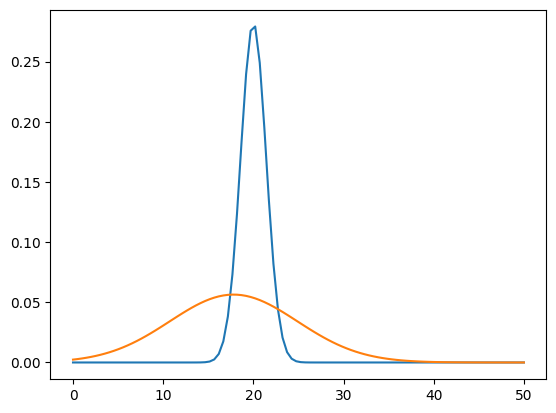

tensor(1.)


In [2]:
# the distribution of prior
mean_u = torch.tensor(20.)
variance_u = torch.tensor(2.)
sigma_u = math.sqrt(variance_u)
x = np.linspace(0, 50, 100)
plt.plot(x, stats.norm.pdf(x, mean_u, sigma_u))

# get utility from prior
utility =  torch.normal(mean = mean_u, std = variance_u)

# delay time and the small early value
t = 50
ss = 5

# the distribution of the estimation
variance_es = torch.tensor(1.)*t
sigma_es = math.sqrt(variance_es)
plt.plot(x, stats.norm.pdf(x, utility, sigma_es))

# get an estimation
estimate = torch.normal(mean = utility, std = variance_es)

# softmax function get the possibility
p = torch.nn.functional.softmax(torch.tensor([estimate, ss]), dim = 0)[0]

# get the choice from bernoulli
choice = torch.bernoulli(p)

# plot
plt.show()
print(p)



When the prior variance changes. 

[[tensor(0.), tensor(1.), tensor(1.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(0.), tensor(0.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(1.), tensor(1.), tensor(0.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(1.), tensor(1.), tensor(0.), tensor(0.), tensor(0.), tensor(1.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(1.), tensor(0.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(0.), tensor(0.), tensor(1.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(1.), tensor(0.), tensor(1.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(0.), te

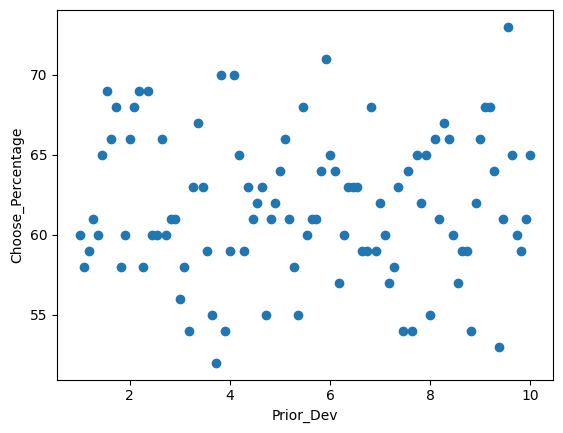

In [2]:
# cycles of the previous process
# prior_dev a list of the 100 range 1-10
# delay 50
# ss value 5
# prior mean 20
# estimation variance 1

sample_num = 100
choices = []
percentage = []
prior_dev = np.linspace(1, 10, 100)
t = 50
ss = 5
mean_u = torch.tensor(20.)
variance_es = torch.tensor(1.)

for i in prior_dev:
    this_choice = []
    for j in range(sample_num):
        u = torch.normal(mean = mean_u, std = i)
        e = torch.normal(mean = u, std = variance_es*t)
        p = torch.nn.functional.softmax(torch.tensor([e, ss]), dim = 0)[0]
        this_choice.append(torch.bernoulli(p))
    percentage.append((len(list(filter(lambda x: (x == 1), this_choice))) / len(this_choice)) * 100)
    choices.append(this_choice)

print(choices)
print(percentage)

plt.scatter(prior_dev, percentage)
plt.xlabel("Prior_Dev")
plt.ylabel("Choose_Percentage")

plt.savefig('images/prior_dev.png')

When the time of delay changes. 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2496\3339232038.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dist = Normal(loc = torch.tensor(u), scale =torch.tensor(variance_es*i))


[[tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), te

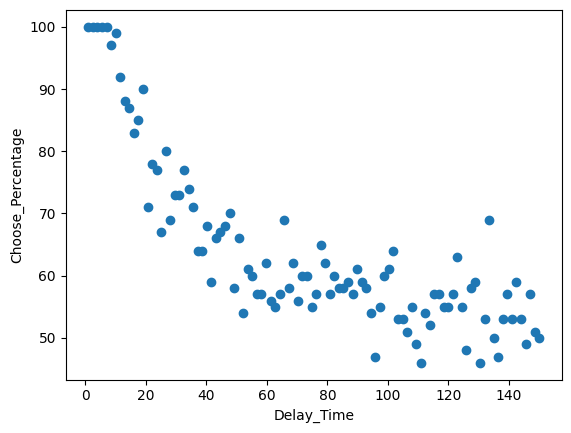

In [12]:
# cycles of the previous process
# time delay a list of the 100 range 1-150
# prior variance 3
# ss value 3
# prior mean 20
# estimation variance 1

sample_num = 100
choices = []
percentage = []
delays = np.linspace(1, 150, 100)
variance_u = torch.tensor(3.)
ss = 3
mean_u = torch.tensor(20.)
variance_es = torch.tensor(1.)
sample_u = []
sample_e = []

for i in delays:
    this_choice = []
    this_u = []
    this_e = []
    for j in range(sample_num):
        u = torch.normal(mean = mean_u, std = variance_u)
        # e = torch.normal(mean = u, std = variance_es*i)

        dist = Normal(loc = torch.tensor(u), scale =torch.tensor(variance_es*i))
        p = 1 - dist.cdf(torch.tensor(ss))
        
        # p = torch.nn.functional.softmax(torch.tensor([e, ss]), dim = 0)[0]
        this_choice.append(torch.bernoulli(p))
        this_u.append(u)
        this_e.append(e)
    percentage.append((len(list(filter(lambda x: (x == 1), this_choice))) / len(this_choice)) * 100)
    sample_u.append(sum(this_u)/len(this_u))
    sample_e.append(sum(this_e)/len(this_e))
    choices.append(this_choice)

print(choices)
print(percentage)

plt.scatter(delays, percentage)
plt.xlabel("Delay_Time")
plt.ylabel("Choose_Percentage")

plt.savefig('images/delay.png')

Text(0, 0.5, 'prior values')

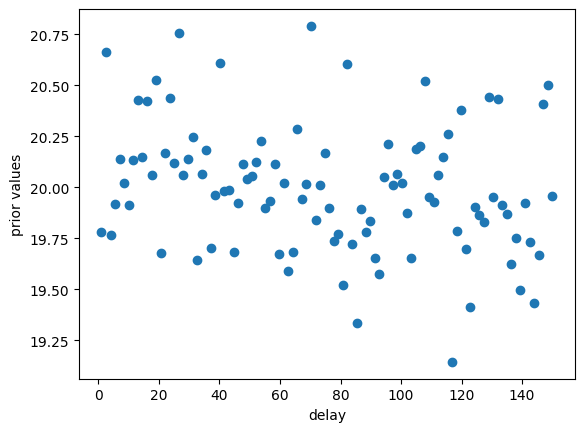

In [16]:
plt.scatter(delays, sample_u)
plt.xlabel("delay")
plt.ylabel("prior values")

Text(0, 0.5, 'estimate values')

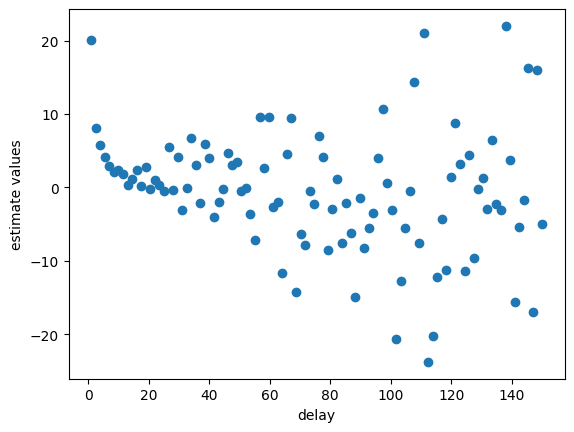

In [17]:
plt.scatter(delays, sample_e)
plt.xlabel("delay")
plt.ylabel("estimate values")

When the prior mean changes.

[[tensor(0.), tensor(1.), tensor(1.), tensor(1.), tensor(0.), tensor(0.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(0.), tensor(0.), tensor(1.), tensor(1.), tensor(1.), tensor(0.), tensor(1.), tensor(0.), tensor(0.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(1.), tensor(0.), tensor(0.), tensor(1.), tensor(0.), tensor(1.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(1.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(1.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(0.), tensor(1.), tensor(0.), tensor(0.), tensor(1.), tensor(1.), tensor(0.), tensor(0.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), tensor(0.), tensor(0.), tensor(0.), tensor(1.), tensor(1.), tensor(0.), tensor(0.), tensor(0.), tensor(1.), tensor(0.), tensor(1.), tensor(1.), te

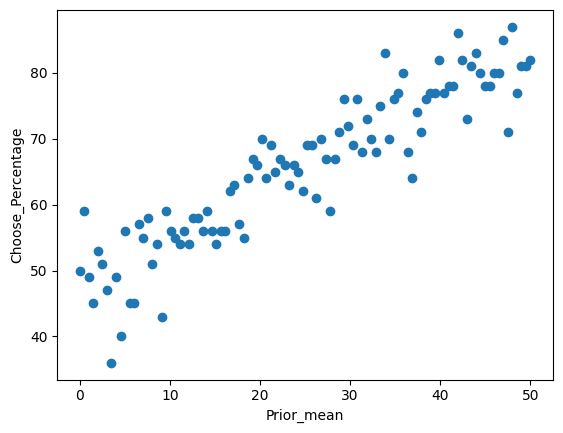

In [45]:
# cycles of the previous process
# prior mean is a list of the 100 range 0-50
# prior variance 3
# delay 50
# ss value 3
# estimation variance 1

sample_num = 100
choices = []
percentage = []
prior_mean = np.linspace(0, 50, 100)
variance_u = torch.tensor(3.)
t = 50
ss = 3
variance_es = torch.tensor(1.)

for i in prior_mean:
    this_choice = []
    for j in range(sample_num):
        u = torch.normal(mean = i, std = variance_u)
        e = torch.normal(mean = u, std = variance_es*t)
        p = torch.nn.functional.softmax(torch.tensor([e, ss]), dim = 0)[0]
        this_choice.append(torch.bernoulli(p))
    percentage.append((len(list(filter(lambda x: (x == 1), this_choice))) / len(this_choice)) * 100)
    choices.append(this_choice)

print(choices)
print(percentage)

plt.scatter(prior_mean, percentage)
plt.xlabel("Prior_mean")
plt.ylabel("Choose_Percentage")

plt.savefig('images/prior_mean.png')

When the estimation variance changes.

[[tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.), te

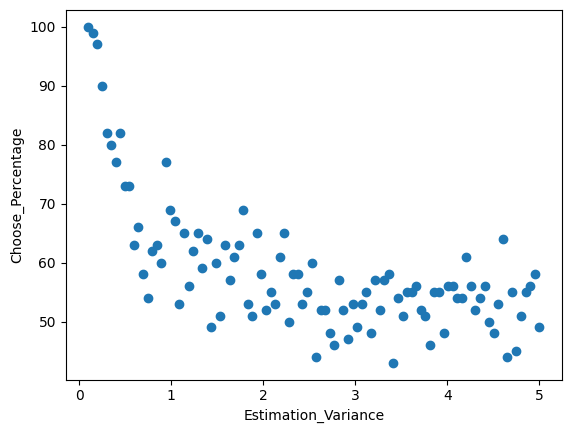

In [46]:
# cycles of the previous process
# estimation variance is a list of the 100 range 0.1-5
# prior variance 3
# delay 50
# ss value 3
# prior mean 20

sample_num = 100
choices = []
percentage = []
variance_es = np.linspace(0.1, 5, 100)
variance_u = torch.tensor(3.)
t = 50
ss = 3
mean_u = torch.tensor(20.)

for i in variance_es:
    this_choice = []
    for j in range(sample_num):
        u = torch.normal(mean = mean_u, std = variance_u)
        e = torch.normal(mean = u, std = i*t)
        p = torch.nn.functional.softmax(torch.tensor([e, ss]), dim = 0)[0]
        this_choice.append(torch.bernoulli(p))
    percentage.append((len(list(filter(lambda x: (x == 1), this_choice))) / len(this_choice)) * 100)
    choices.append(this_choice)

print(choices)
print(percentage)

plt.scatter(variance_es, percentage)
plt.xlabel("Estimation_Variance")
plt.ylabel("Choose_Percentage")

plt.savefig('images/es_var.png')